# Stack Overflow

`site:stackoverflow.com ggplot2 remove legend`

- Course Slack site

# Assigment #2 hints

In [1]:
library('tidyverse')
library('ggrepel')
library('patchwork')

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



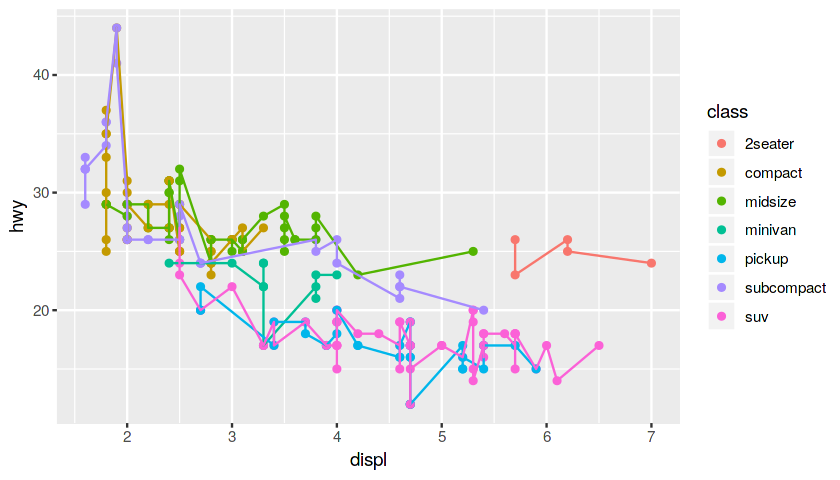

In [4]:
# When adding geom_line, the legend has dots with lines, doing show.legend false removes that line from the legend

options(repr.plot.width = 7, repr.plot.height = 4)

p = ggplot(mpg, aes(x = displ, y = hwy, color = class))

p = p + geom_point()

p = p + geom_line(show.legend = FALSE)

p

# top_n

In [3]:
top.hwy = mpg %>% top_n(1, hwy)

top.hwy

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact


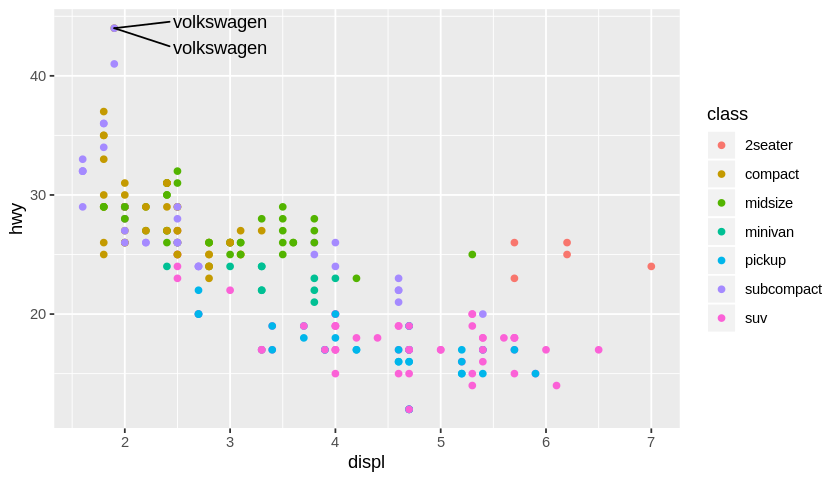

In [4]:
p = ggplot(mpg, aes(x = displ, y = hwy, color = class))

p = p + geom_point()

p = p + geom_text_repel(data = top.hwy, 
                        nudge_x = 1,
                        direction = 'y',
                        aes(label = manufacturer), 
                        color = 'black')  # this is important because it no longer maps as according to the legend and won't be added to the legend

p.hwy = p

p

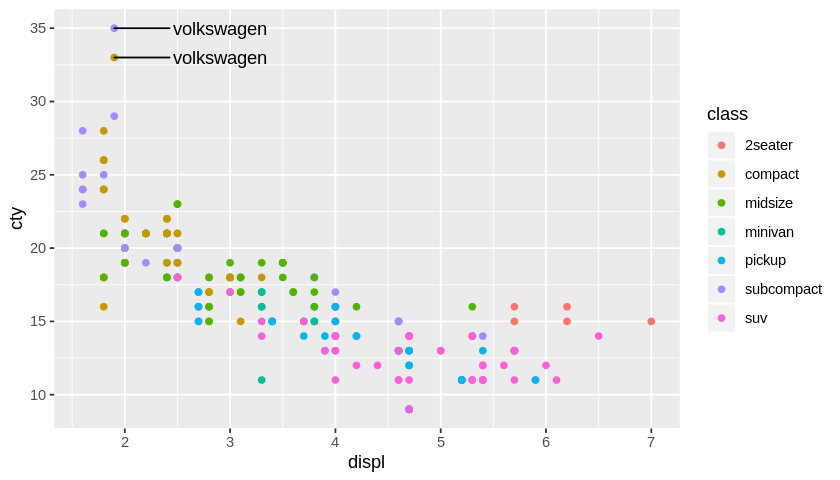

In [5]:
p = ggplot(mpg, aes(x = displ, y = cty, color = class))

p = p + geom_point()

p = p + geom_text_repel(data = top.hwy, 
                        nudge_x = 1,
                        direction = 'y',
                        aes(label = manufacturer), 
                        color = 'black')

p.cty = p

p

In [6]:
# p.hwy + p.cty

In [7]:
# p.hwy = p.hwy + theme(legend.position = 'none')

# p.hwy + p.cty

In [8]:
# options(repr.plot.width = 10, repr.plot.height = 4)

# p.hwy = p.hwy + ylim(c(0, 45))

# p.cty = p.cty + ylim(c(0, 45))

# p.hwy + p.cty

# Other summary functions

In [2]:
library('nycflights13')

In [12]:
weather %>% head

origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
EWR,2013,1,1,1,39.02,26.06,59.37,270,10.35702,NA,0,1012.0,10,2013-01-01 01:00:00
EWR,2013,1,1,2,39.02,26.96,61.63,250,8.05546,NA,0,1012.3,10,2013-01-01 02:00:00
EWR,2013,1,1,3,39.02,28.04,64.43,240,11.50780,NA,0,1012.5,10,2013-01-01 03:00:00
EWR,2013,1,1,4,39.92,28.04,62.21,250,12.65858,NA,0,1012.2,10,2013-01-01 04:00:00
EWR,2013,1,1,5,39.02,28.04,64.43,260,12.65858,NA,0,1011.9,10,2013-01-01 05:00:00
EWR,2013,1,1,6,37.94,28.04,67.21,240,11.50780,NA,0,1012.4,10,2013-01-01 06:00:00


Warning message:
“Removed 1 rows containing missing values (geom_point).”


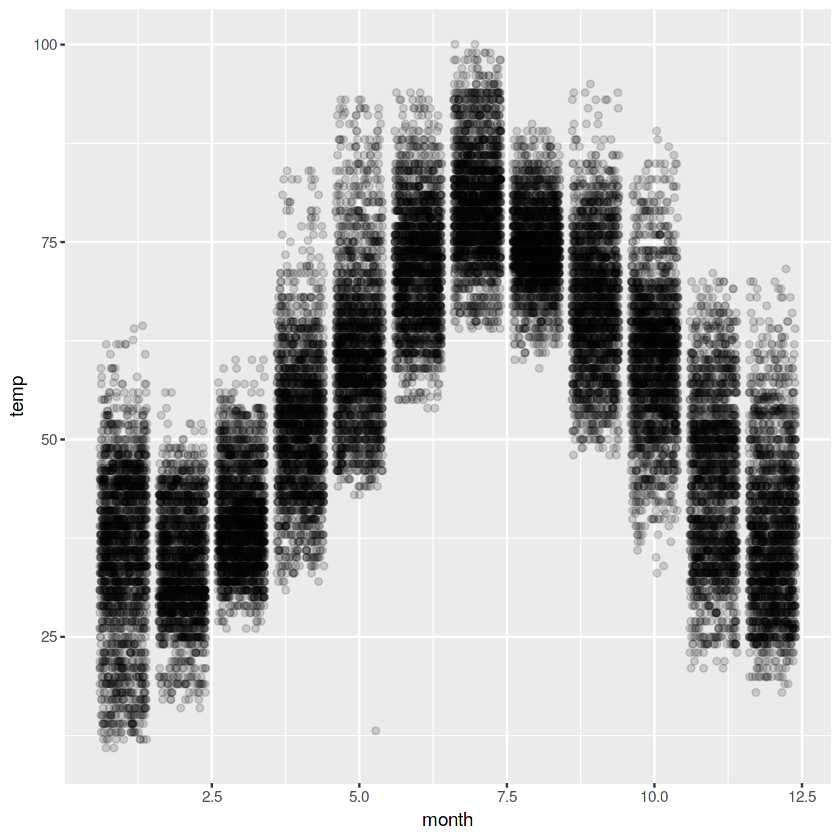

In [5]:
p = ggplot(weather, aes(x = month, y = temp))

p = p + geom_point(alpha = 0.15, 
                   position = position_jitter(h = 0, w = 0.4))

p

## mean, median, max, min

In [3]:
# There's a missing value so using na.rm removes the missing value
weather %>%
    group_by(month) %>%
    summarize(median.temp = median(temp, na.rm = TRUE)) %>%
    arrange(median.temp)

month,median.temp
<dbl>,<dbl>
2,33.98
1,37.04
12,37.04
3,39.02
11,44.96
4,51.98
5,60.98
10,60.98
9,66.92


Warning message:
“Removed 1 rows containing missing values (geom_point).”


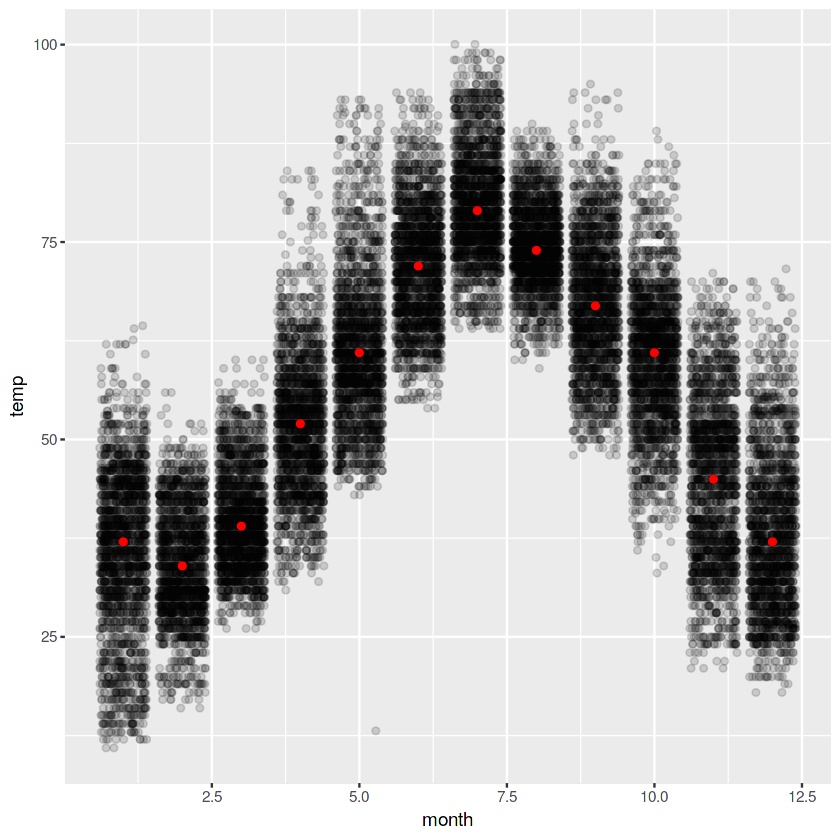

In [7]:
p = p + geom_point(
        color = "red",
        data = weather %>%
            group_by(month) %>%
            summarize(temp = median(temp, na.rm = TRUE))
        )    
p

In [ ]:
weather %>%
    group_by(month) %>%
    summarize(median.temp = max(temp, na.rm = TRUE)) %>%
    arrange(max.temp)

## sd, IQR

In [8]:
weather %>%
    group_by(month) %>%
    summarize(sd.temp = sd(temp, na.rm = TRUE)) %>%
    arrange(sd.temp)

month,sd.temp
<dbl>,<dbl>
8,5.191615
3,6.249278
2,6.982378
7,7.119899
6,7.546371
9,8.465902
4,8.786168
10,8.846035
5,9.681644


# Data import/export

## readr

In [32]:
# ?readr

In [33]:
# ?read_csv

In [37]:
# ?write_csv

In [41]:
library('nycflights13')

weather %>% head

origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
EWR,2013,1,1,1,39.02,26.06,59.37,270,10.35702,NA,0,1012.0,10,2013-01-01 01:00:00
EWR,2013,1,1,2,39.02,26.96,61.63,250,8.05546,NA,0,1012.3,10,2013-01-01 02:00:00
EWR,2013,1,1,3,39.02,28.04,64.43,240,11.50780,NA,0,1012.5,10,2013-01-01 03:00:00
EWR,2013,1,1,4,39.92,28.04,62.21,250,12.65858,NA,0,1012.2,10,2013-01-01 04:00:00
EWR,2013,1,1,5,39.02,28.04,64.43,260,12.65858,NA,0,1011.9,10,2013-01-01 05:00:00
EWR,2013,1,1,6,37.94,28.04,67.21,240,11.50780,NA,0,1012.4,10,2013-01-01 06:00:00


In [42]:
weather %>% write_csv('weather.csv')

In [40]:
system("head weather.csv", intern=TRUE)

[1] "origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour"
 [2] "EWR,2013,1,1,1,39.02,26.06,59.37,270,10.357019999999999,NA,0,1012,10,2013-01-01T06:00:00Z"               
 [3] "EWR,2013,1,1,2,39.02,26.96,61.63,250,8.05546,NA,0,1012.3,10,2013-01-01T07:00:00Z"                        
 [4] "EWR,2013,1,1,3,39.02,28.04,64.43,240,11.5078,NA,0,1012.5,10,2013-01-01T08:00:00Z"                        
 [5] "EWR,2013,1,1,4,39.92,28.04,62.21,250,12.658579999999999,NA,0,1012.2,10,2013-01-01T09:00:00Z"             
 [6] "EWR,2013,1,1,5,39.02,28.04,64.43,260,12.658579999999999,NA,0,1011.9,10,2013-01-01T10:00:00Z"             
 [7] "EWR,2013,1,1,6,37.94,28.04,67.21,240,11.5078,NA,0,1012.4,10,2013-01-01T11:00:00Z"                        
 [8] "EWR,2013,1,1,7,39.02,28.04,64.43,240,14.960139999999999,NA,0,1012.2,10,2013-01-01T12:00:00Z"             
 [9] "EWR,2013,1,1,8,39.92,28.04,62.21,250,10.357019999999999,NA,0,1012.2,10,2013-01-01T13:00:00Z"             
[10] "EWR,2013,1,1,9,39.92,28.04,62.21,260,14.960139999999999,NA,0,1012.7,10,2013-01-01T14:00:00Z"

## Reading data directly from URL